# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["seaborn-v0_8-whitegrid"])


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


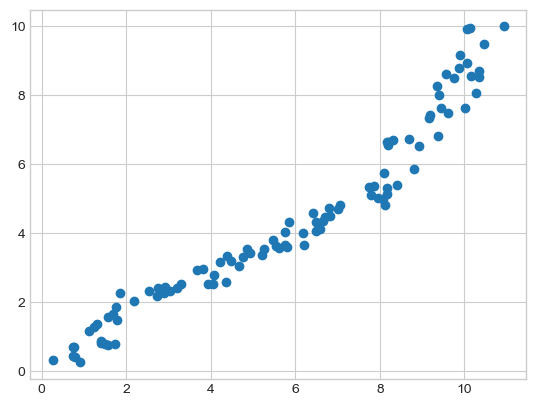

In [4]:
noise = np.random.rand(100, 1)
X = sorted(10 * np.random.rand(100, 1)) + noise
y = sorted(10 * np.random.rand(100))
plt.scatter(X, y)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
print(model.coef_)
print(model.intercept_)

[0.81941642]
-0.35424650444739214


In [7]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9241993286042677
0.9481171204742989


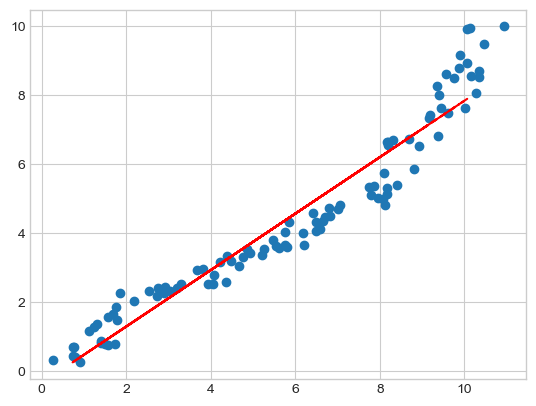

In [9]:
predict = model.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, predict, "--r")


### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [8]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.keys())
print(diabetes.DESCR)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - 

In [9]:
import pandas as pd

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["target"] = diabetes.target
diabetes_df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


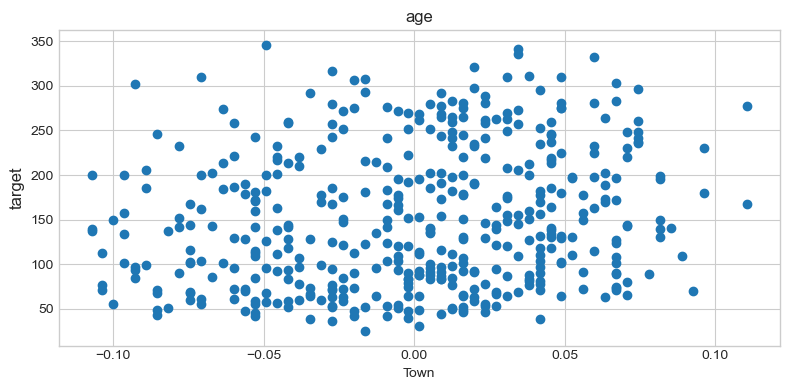

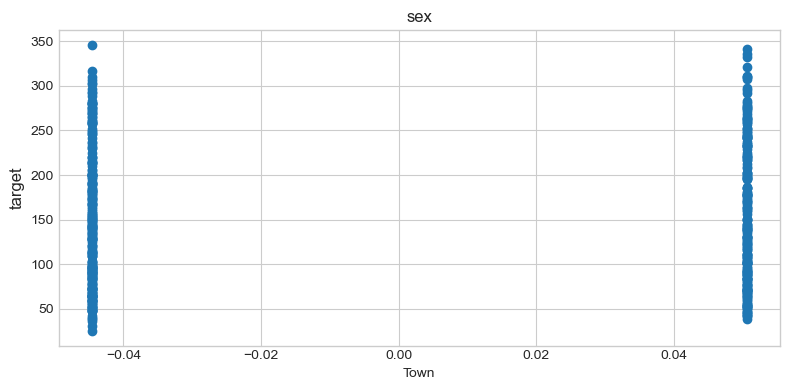

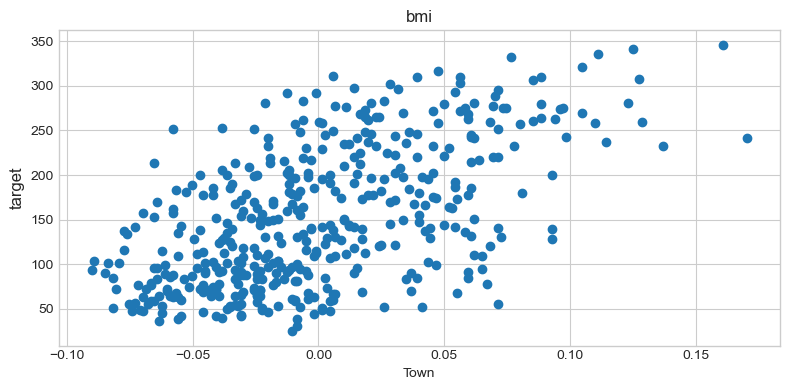

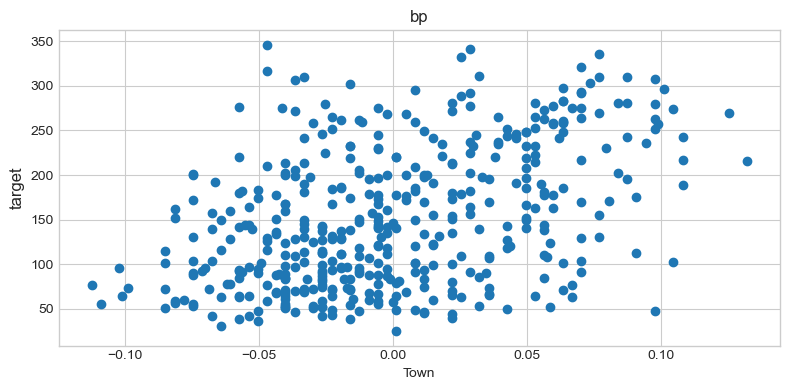

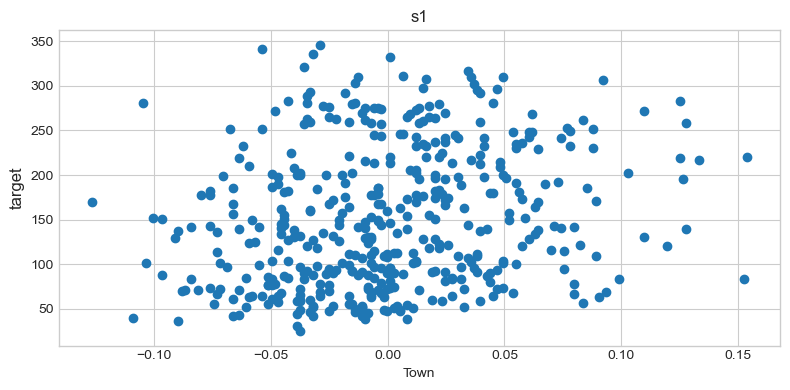

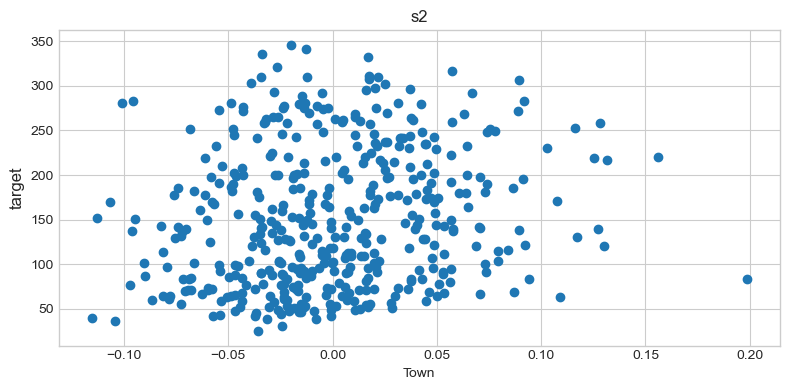

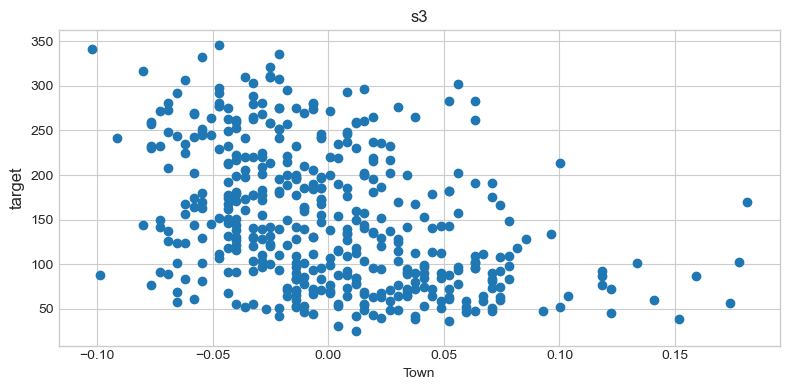

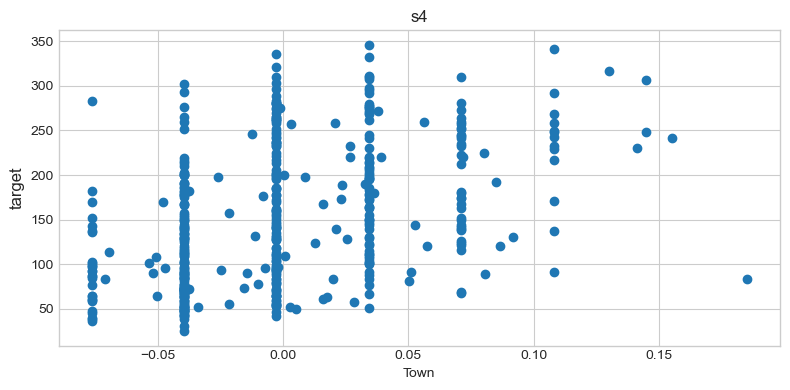

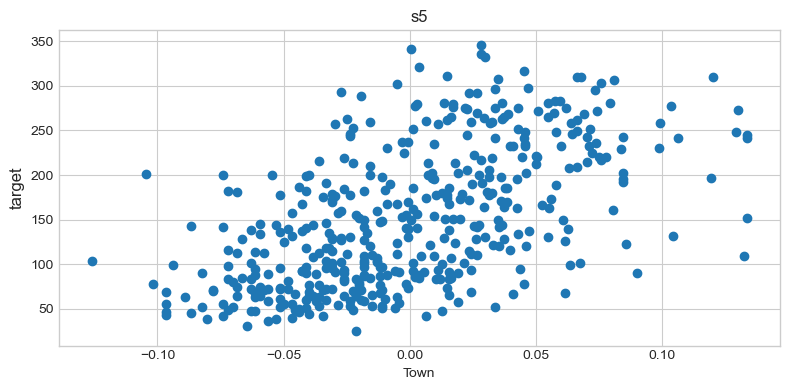

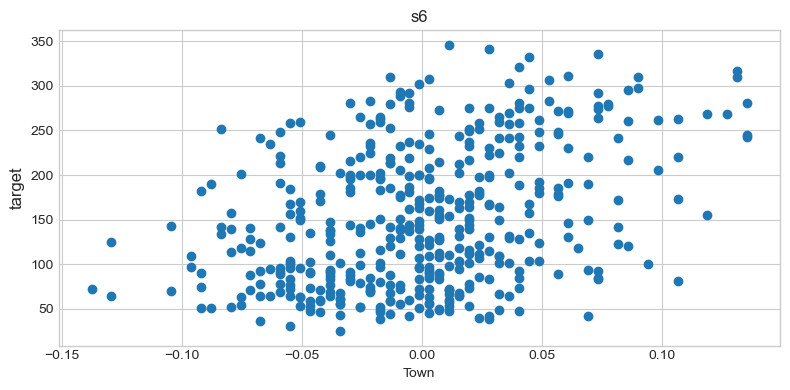

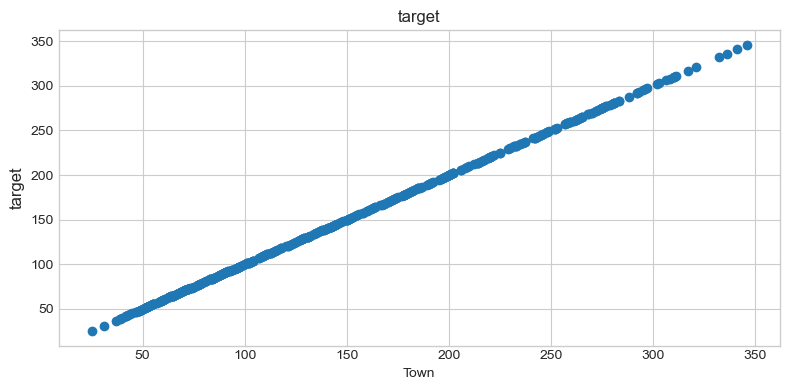

In [11]:
for i, col in enumerate(diabetes_df.columns):
    plt.figure(figsize=(8, 4))
    plt.scatter(diabetes_df[col], diabetes_df["target"])
    plt.ylabel("target", size=12)
    plt.title(col)
    plt.xlabel("Town")
    plt.tight_layout()


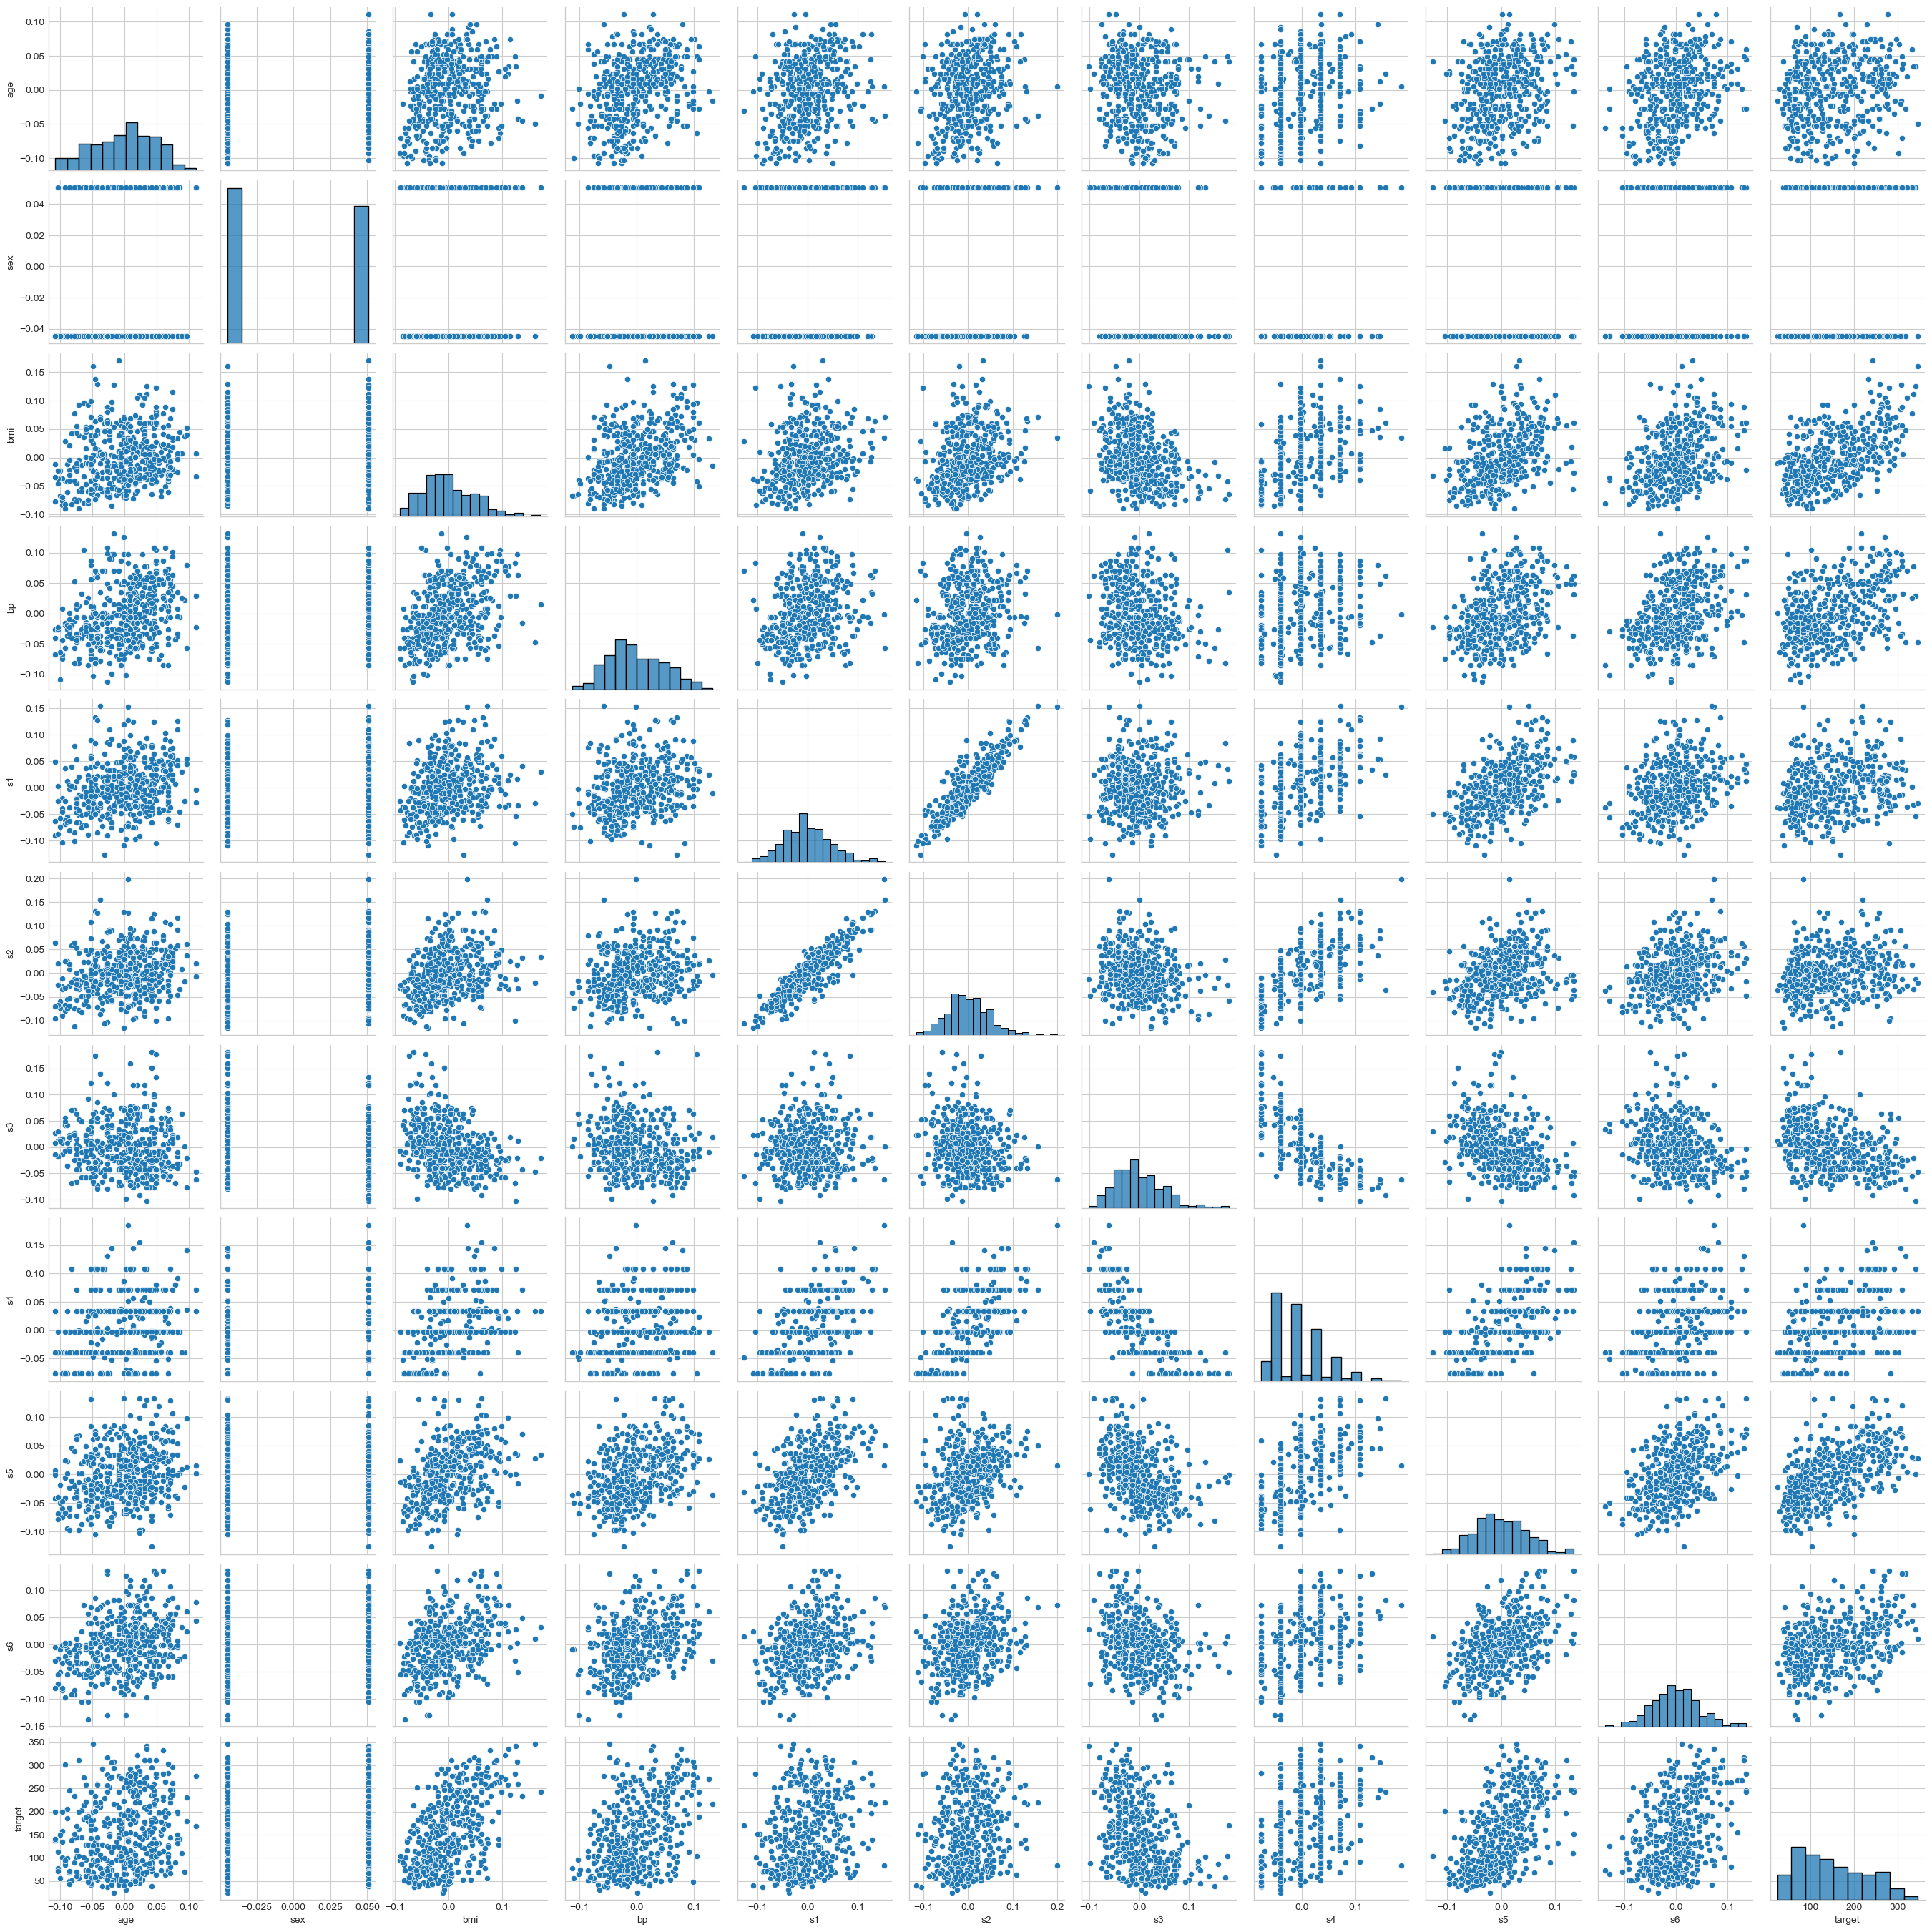

In [36]:
import seaborn as sns

sns.pairplot(diabetes_df)


### 보스턴 주택 가격에 대한 선형 회귀

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9241993286042677
0.9481171204742989


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model, diabetes.data, diabetes.target, cv=10, scoring="neg_mean_squared_error"
)
print(scores)
print(scores.mean())
print(scores.std())


[-2533.84017856 -2870.77758341 -3512.72914835 -2759.20855951
 -3555.69402408 -2900.34540046 -3696.33102548 -2282.33961544
 -4122.99489276 -1769.64247356]
-3000.390290160842
681.7925615943558


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [24]:
r2_scores = cross_val_score(model, diabetes.data, diabetes.target, cv=10, scoring="r2")
print(r2_scores)
print(r2_scores.mean())
print(r2_scores.std())


[0.5561455  0.23055827 0.35357673 0.62190752 0.2658727  0.61819798
 0.41815142 0.43513747 0.43436229 0.68569253]
0.4619602420450602
0.14699145073153733


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [27]:
print(f"y = {model.intercept_} + ")
for i, c in enumerate(model.coef_):
    print(f"{c} * x{i}")


y = 0.20573414392079314 + 
0.9872522966607764 * x0


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, predict))
r2 = r2_score(y_train, predict)
print(rmse)
print(r2)


0.465511378311292
0.9771154487841894


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
print(rmse)
print(r2)


0.3781886918377129
0.9827285821836512


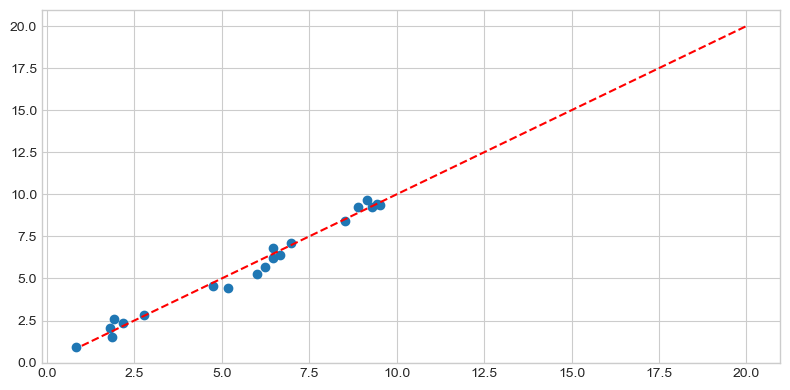

In [43]:
def plot_diabetes_price(expected, predicted):
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([1, 20], [1, 20], "--r")
    plt.tight_layout()


predicted = model.predict(X_test)
expected = y_test
plot_diabetes_price(expected, predicted)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [1]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys)
print(california.DESCR)


/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<built-in method keys of Bunch object at 0x117966400>
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thou

In [2]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["target"] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
california_df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


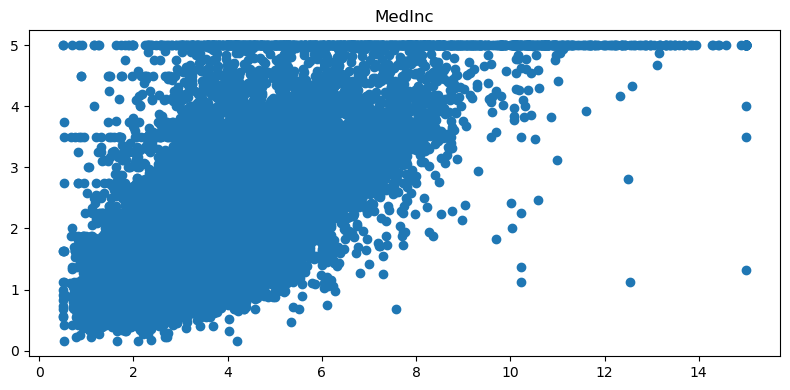

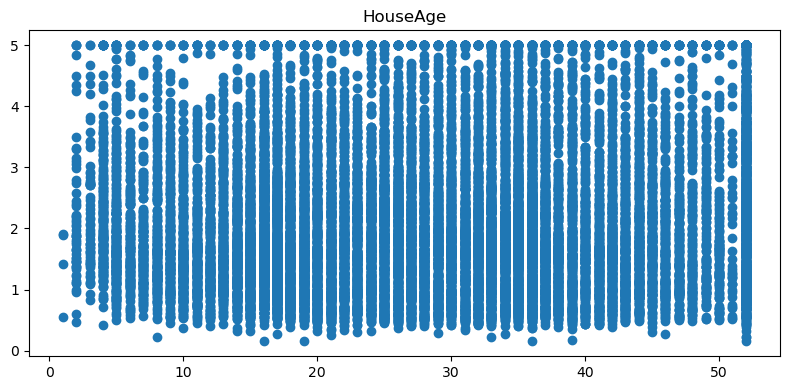

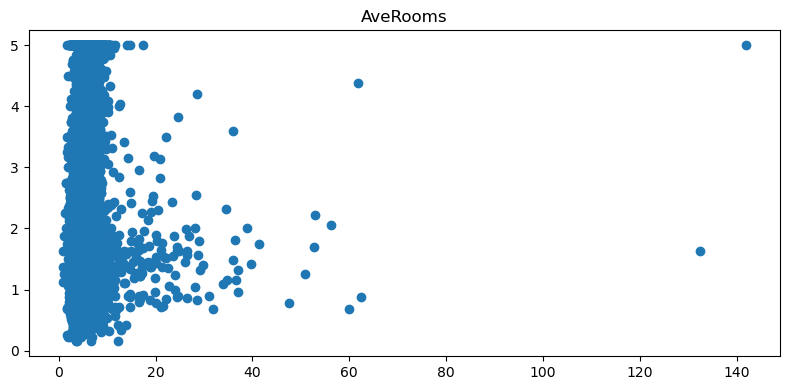

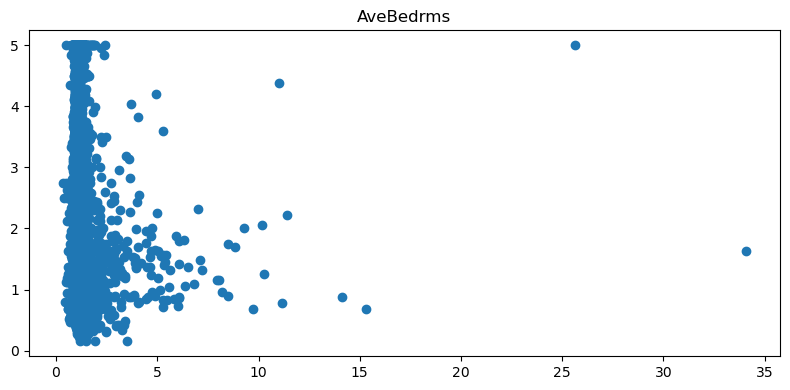

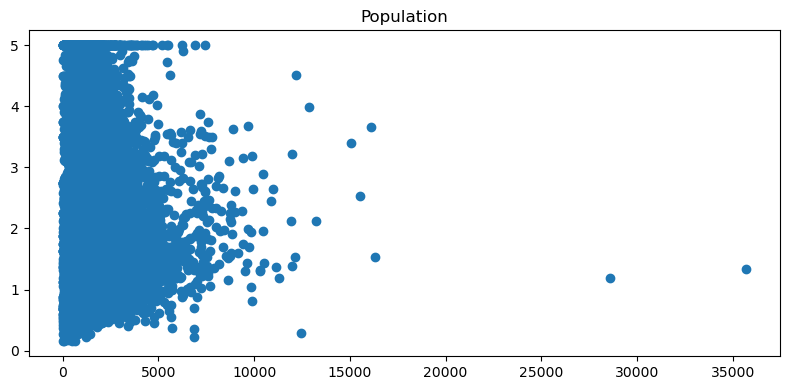

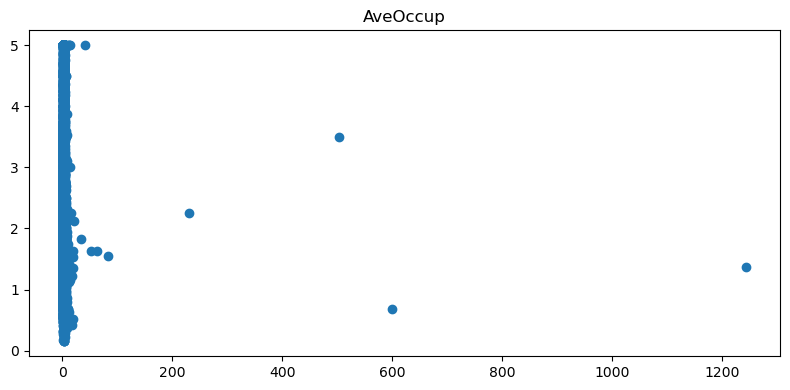

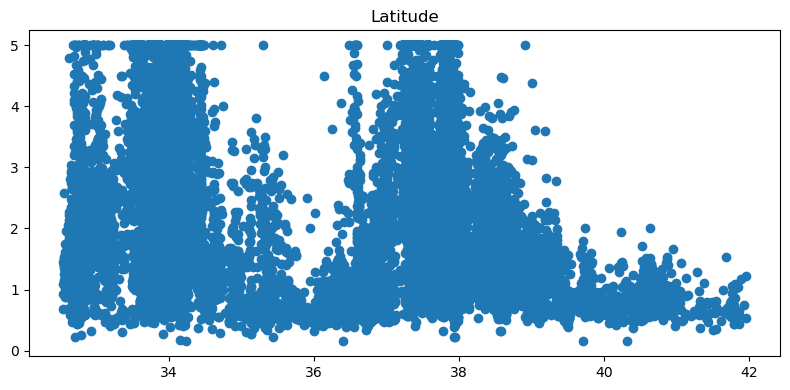

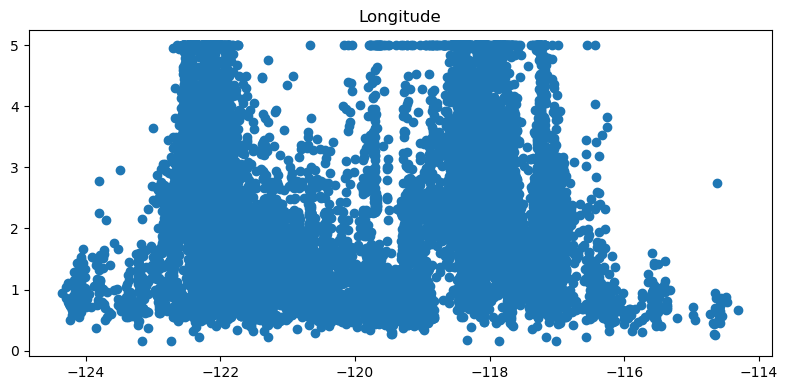

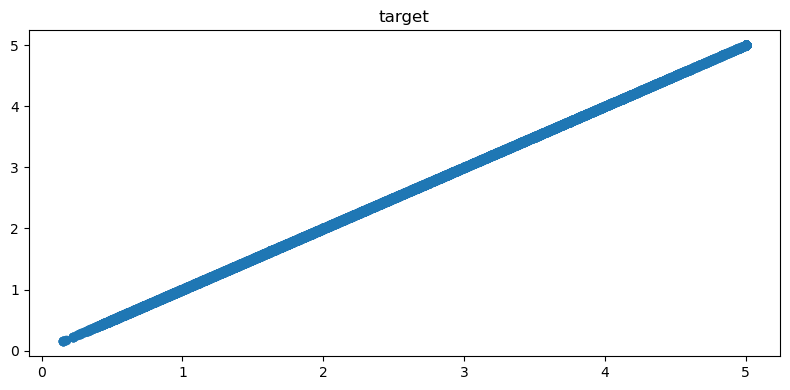

In [4]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8, 4))
    plt.scatter(california_df[col], california_df["target"])
    plt.title(col)
    plt.tight_layout()

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

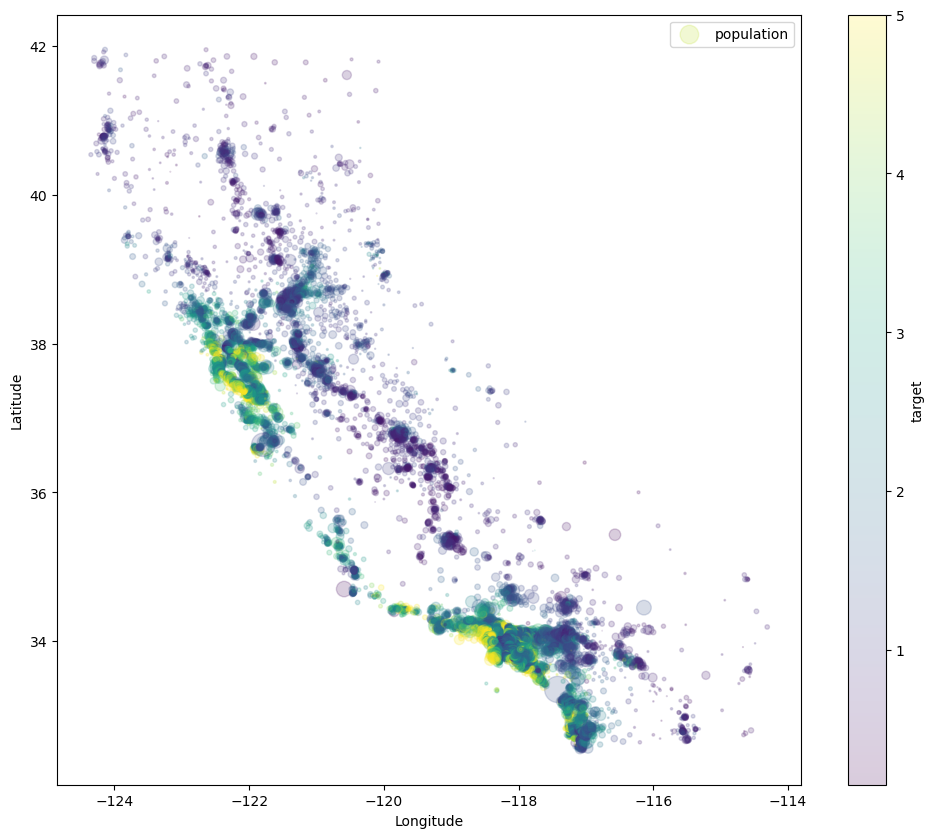

In [14]:
import seaborn as sns

california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.2,
    figsize=(12, 10),
    s=california_df["Population"] / 100,
    label="population",
    c="target",
    cmap=plt.get_cmap("viridis"),
    colorbar=True,
)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, test_size=0.2
)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring="r2")
print(scores.mean())

0.607525016861889
0.6005896836558631
0.5110068610523766


In [23]:
print(f"y = {model.intercept_} +")
for i, c in enumerate(model.coef_):
    print(f"{c} * x{i}")

y = -36.81650465151931 +
0.43307246616216766 * x0
0.009339793838436704 * x1
-0.10012258059937869 * x2
0.5970862238876019 * x3
-2.3759247006030923e-06 * x4
-0.0033994243201409297 * x5
-0.4224914208432785 * x6
-0.43401639724707236 * x7


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)
print(rmse, r2)


0.7309986640319098 0.6005896836558631


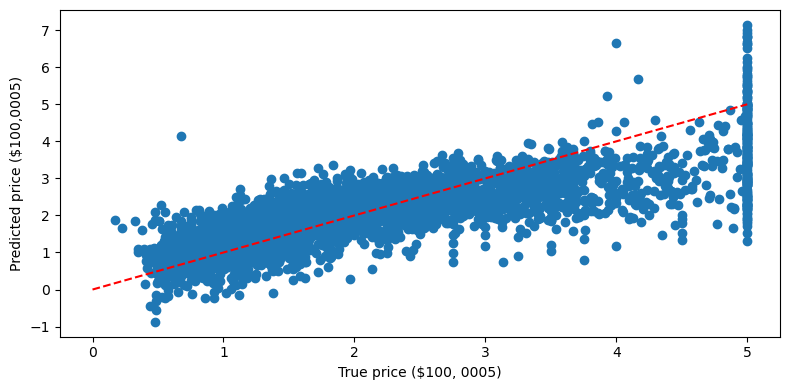

In [37]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], "--r")
    plt.xlabel("True price ($100, 0005)")
    plt.ylabel("Predicted price ($100,0005)")
    plt.tight_layout()


predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [57]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.2)
model.fit(X_train, y_train)


Ridge(alpha=0.2)

In [56]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.607524982336593
0.6005767111156867


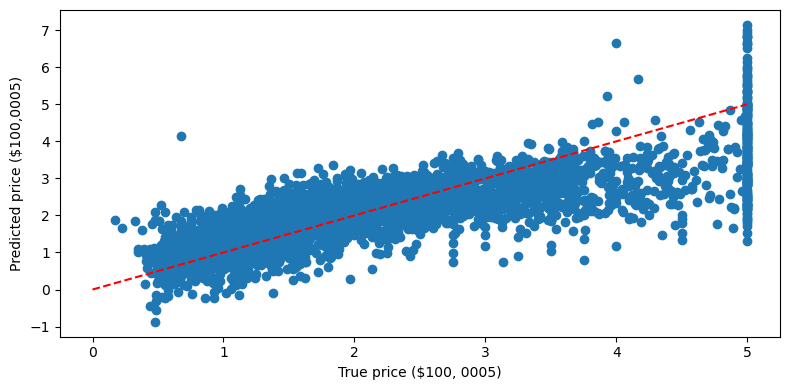

In [59]:
plot_california_prices(y_test, model.predict(X_test))


* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [66]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.010)
model.fit(X_train, y_train)


Lasso(alpha=0.01)

In [67]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.6038492492542248
0.5934765073099386


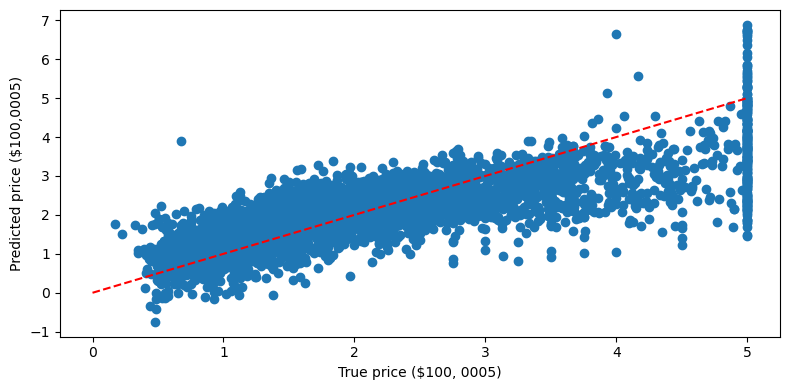

In [68]:
plot_california_prices(y_test, model.predict(X_test))


## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 캘리포니아 주택 가격에 대한 신축망

In [76]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)


ElasticNet(alpha=0.01)

In [77]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.6059007606710749
0.5965384153251526


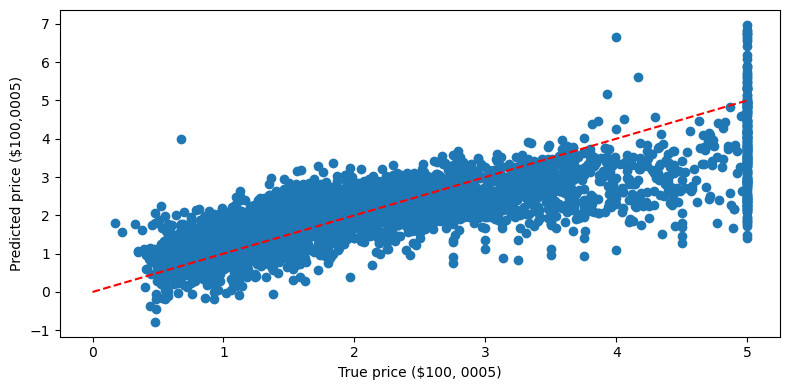

In [78]:
plot_california_prices(y_test, model.predict(X_test))


## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

In [82]:
from sklearn.linear_model import OrthogonalMatchingPursuit

model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [83]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.5222804269077346
0.5070568294147939


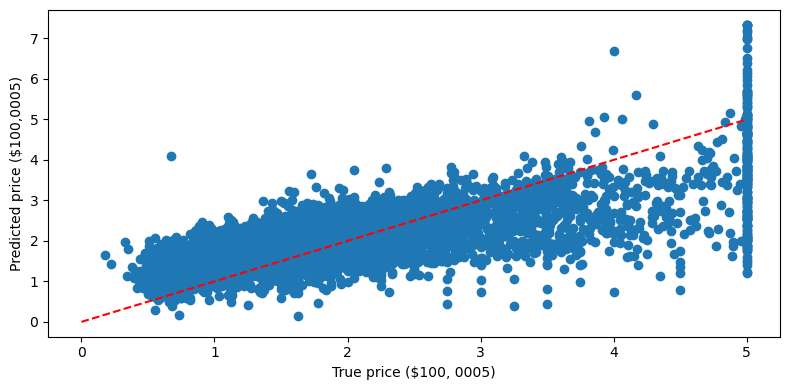

In [84]:
plot_california_prices(y_test, model.predict(X_test))


## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


### 캘리포니아 주택 가격에 대한 다항 회귀

In [85]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=2), StandardScaler(), LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [86]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.6830544314791909
0.6822933246397198


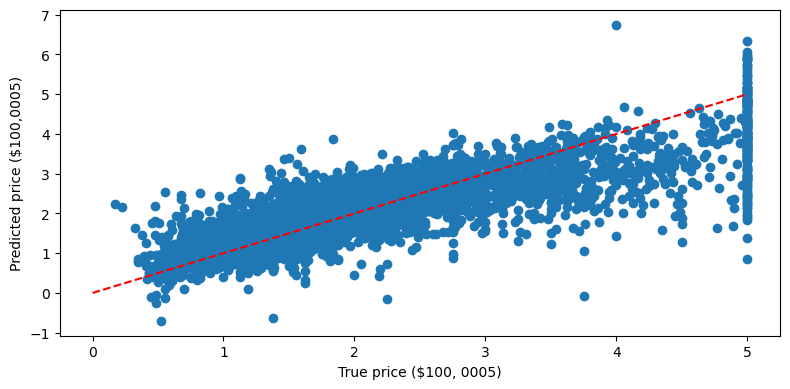

In [87]:
plot_california_prices(y_test, model.predict(X_test))


## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly